In [2]:
import glob
import os

folderpath = r"C:\Users\jarjarbinks\code\k-exp\kexp\results\*\*\*"
list_of_files = glob.glob(folderpath) # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getmtime)
print(latest_file)

C:\Users\jarjarbinks\code\k-exp\kexp\results\2023-02-27\13\000000306-TOF_MOT.h5


In [3]:
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

f = h5py.File(latest_file)
data = f['datasets']

In [12]:
def plot_imgs(idx):
    plt.figure(figsize=(40,15))
    idx = 0
    img0 = data['img_all'][idx]
    img1 = data['img_all'][idx+1]
    img2 = data['img_all'][idx+2]
    img3 = data['img_all'][idx+3]
    plt.subplot(1,4,1)
    plt.imshow(img0)
    plt.subplot(1,4,2)
    plt.imshow(img1)
    plt.subplot(1,4,3)
    plt.imshow(img2)
    plt.subplot(1,4,4)
    plt.imshow(img3)
    plt.show()

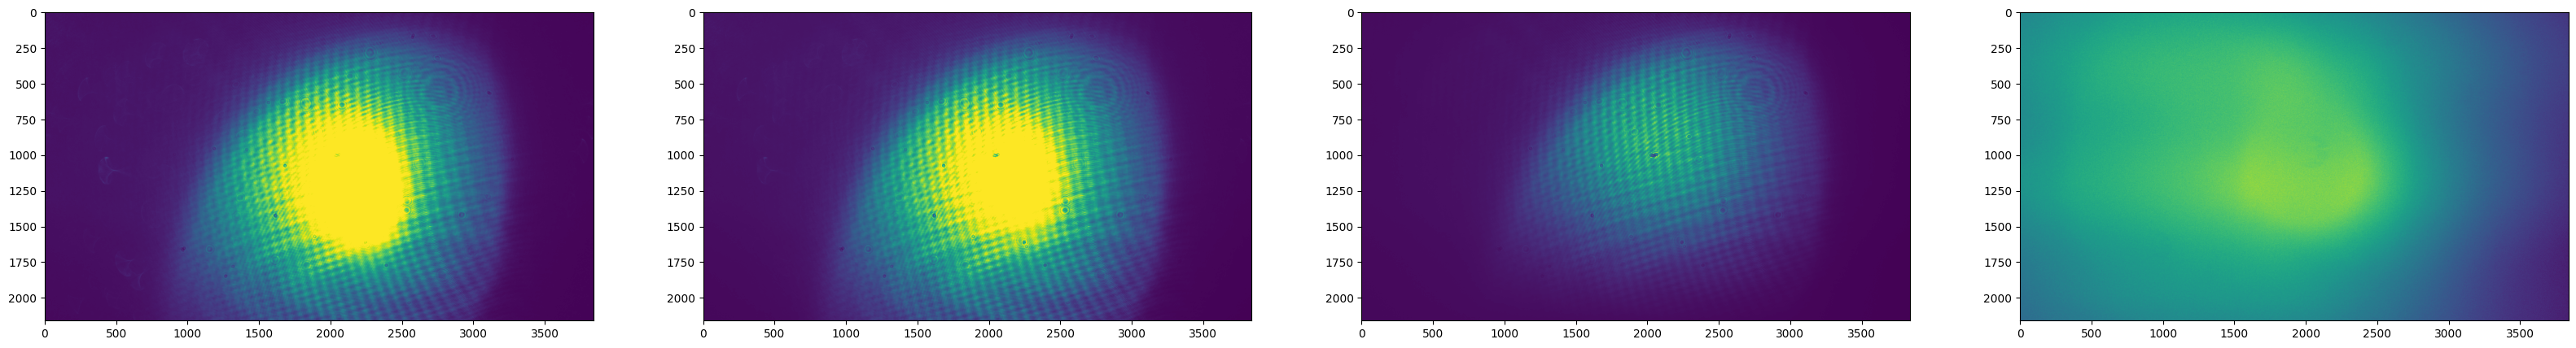

In [13]:
plot_imgs(0)

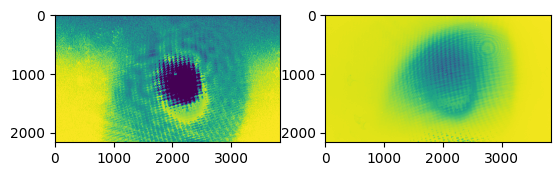

In [10]:
plt.figure()
plt.subplot(1,2,1)
img_atoms_no_bkgd = img1 - img0
plt.imshow(img_atoms_no_bkgd)
plt.subplot(1,2,2)
plt.imshow(img_atoms_no_bkgd - img2)
plt.show()

In [7]:
import numpy as np
t = data['img_timestamps_ns'][idx:(idx+3)]
np.diff(t)/1.e9 * 1.e6

array([2000042.63,   75001.43])

In [8]:
list(data.keys())

['N_img',
 'V_mot_current_V',
 'img_all',
 'img_timestamps_ns',
 't_2D_mot_load_delay_s',
 't_cam_exposure_time_s',
 't_cam_overlap_time_s',
 't_camera_trigger_s',
 't_dark_image_delay_s',
 't_exposure_delay_s',
 't_imaging_delay_s',
 't_imaging_pulse_s',
 't_light_only_image_delay_s',
 't_mot_kill_s',
 't_mot_load_s',
 't_pretrigger_s',
 't_tof_list_s',
 't_total_row_delay_s']